# Developing a Neural network ConvNet using Tensorflow 

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2020-09-08 11:13:59--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.216.128, 172.217.193.128, 172.217.204.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.216.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   177MB/s    in 0.8s    

2020-09-08 11:14:00 (177 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [3]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()

In [4]:

train_horse = os.path.join('/tmp/horse-or-human/horses')

train_human = os.path.join('/tmp/horse-or-human/humans')

In [5]:
train_horse_names = os.listdir(train_horse)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human)
print(train_human_names[:10])

['horse49-4.png', 'horse50-5.png', 'horse04-7.png', 'horse31-6.png', 'horse10-2.png', 'horse29-4.png', 'horse31-3.png', 'horse06-7.png', 'horse16-7.png', 'horse01-6.png']
['human08-27.png', 'human01-24.png', 'human08-24.png', 'human08-26.png', 'human17-27.png', 'human11-04.png', 'human12-04.png', 'human07-23.png', 'human15-28.png', 'human17-21.png']


In [6]:
print('total training horse images:', len(os.listdir(train_horse)))
print('total training human images:', len(os.listdir(train_human)))

total training horse images: 500
total training human images: 527


In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

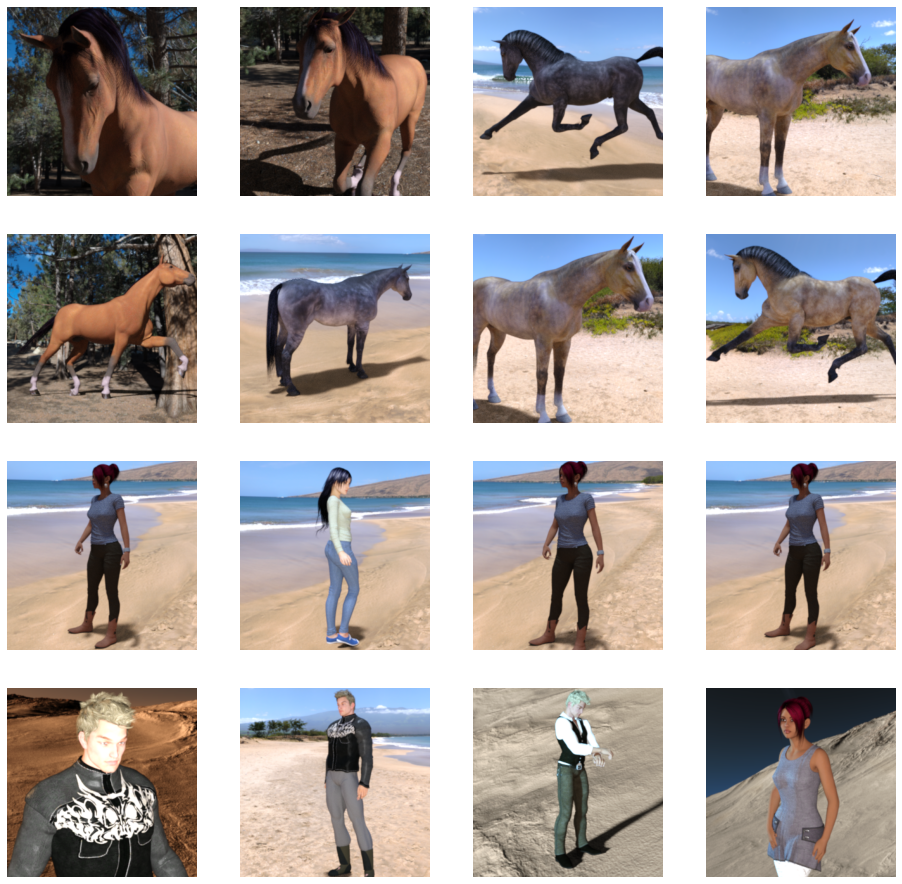

In [8]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse , fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human , fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

## Building the model

In [9]:
import tensorflow as tf

In [11]:
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(16,(3,3),activation= 'relu',input_shape=(300,300,3)),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Flatten(),
                             # 512 neuron hidden layer
                             tf.keras.layers.Dense(512,activation='relu'),
                             # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
                             tf.keras.layers.Dense(1,activation='sigmoid')
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 33, 33, 64)        3

In [15]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss= 'binary_crossentropy',
              optimizer = RMSprop(lr = 0.001),
              metrics = ['accuracy'])

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    '/tmp/horse-or-human/',
    target_size = (300,300),
    batch_size = 128,
    class_mode = 'binary'
)

Found 1027 images belonging to 2 classes.


In [19]:
history = model.fit(
    train_generator,
    steps_per_epoch = 8,
    epochs = 10,
    verbose = 1
)

Epoch 1/10
8/8 [==============================] - 65s 8s/step - loss: 1.2223 - accuracy: 0.5106
Epoch 2/10
8/8 [==============================] - 64s 8s/step - loss: 0.8013 - accuracy: 0.6841
Epoch 3/10
8/8 [==============================] - 65s 8s/step - loss: 0.5978 - accuracy: 0.8254
Epoch 4/10
8/8 [==============================] - 64s 8s/step - loss: 0.3837 - accuracy: 0.8888
Epoch 5/10
8/8 [==============================] - 66s 8s/step - loss: 0.2921 - accuracy: 0.8899
Epoch 6/10
8/8 [==============================] - 68s 8s/step - loss: 0.1445 - accuracy: 0.9511
Epoch 7/10
8/8 [==============================] - 73s 9s/step - loss: 0.0770 - accuracy: 0.9733
Epoch 8/10
8/8 [==============================] - 76s 9s/step - loss: 0.0796 - accuracy: 0.9689
Epoch 9/10
8/8 [==============================] - 64s 8s/step - loss: 0.2758 - accuracy: 0.9066
Epoch 10/10
8/8 [==============================] - 64s 8s/step - loss: 0.0272 - accuracy: 0.9900


In [22]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

Saving Test image.jpg to Test image.jpg
[0.]
Test image.jpg is a horse
